In [47]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# Задание формата шрифта для графиков
plt.rcParams["font.family"] = 'serif'
plt.rcParams['font.weight'] = 'ultralight'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams['font.style'] = 'normal'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.fontset'] = 'stix'

In [48]:
def get_val_mean(filename):
    """
    Функция для вывода среднего значения параметра при квазистационарном обтекании
    (берется среднее попоследним 500 итерациям)
    Ввод:
        - filename(str) - имя файла, записанного флюентом
    Вывод:
        - sr(float) - среднее значение параметра при квазистационарном обтекании
    """
    f = open ( filename , 'r')
    l = []
    l = [ line.split() for line in f]
    x = np.array(l[3:], dtype = 'float')[:,0]
    y = np.array(l[3:], dtype = 'float')[:,1]
    y_last = y[(len(y) - 500):]
    x_last = x[(len(x) - 500):]
    sr = 0.5 * (np.max(y_last) + np.min(y_last))
    return sr

def get_plot_values(filename):
    """
    Функция для построения графика изменения параметра в зависимости от итерации
    Ввод:
        - filename(str) - имя файла, записанного флюентом
    """
    f = open ( filename , 'r')
    l = []
    l = [ line.split() for line in f]
    x = np.array(l[3:], dtype = 'float')[:,0]
    y = np.array(l[3:], dtype = 'float')[:,1]
    fg = plt.figure(figsize=(9, 5))
    plt.plot(x,y, color = 'black')
    plt.hlines(get_val_mean(filename), x[0], x[-1], lw = 1, ls = '--', color = 'red')
    plt.grid(color = 'lightgray')
    plt.show()

def get_value(filename):
    """
    Функция для вывода значения параметра при последней итерации
    Ввод:
        - filename(str) - имя файла, записанного флюентом
    Вывод:
        - sr(float) - среднее значение параметра при квазистационарном обтекании
    """
    f = open ( filename , 'r')
    l = []
    l = [ line.split() for line in f]
    x = np.array(l[3:], dtype = 'float')[:,0]
    y = np.array(l[3:], dtype = 'float')[:,1]
    value = y[-1]
    return value

In [49]:
def c_y_to_c_ya(alpha, cy, cx):
    '''
    Перевод коэффициентов c_y из связанной СК в скоростную
    Ввод:
        - alpha (np.array) - массив углов атаки, [град]
        - cy (np.array) - массив коэффициентов нормальной силы, [/]
        - cx (np.array) - массив коэффициентов продольной силы, [/]
    Вывод:
        - c_y_a (np.array) - массив коэффициентов подъемной силы, [/]     
    '''
    c_y_a = cy * np.cos(np.deg2rad(alpha)) - cx * np.sin(np.deg2rad(alpha))
    return c_y_a

def c_x_to_c_xa(alpha, cy, cx):
    '''
    Перевод коэффициентов c_x из связанной СК в скоростную
    Ввод:
        - alpha (np.array) - массив углов атаки, [град]
        - cy (np.array) - массив коэффициентов нормальной силы, [/]
        - cx (np.array) - массив коэффициентов продольной силы, [/]
    Вывод:
        - c_x_a (np.array) - массив коэффициентов подъемной силы, [/]     
    '''
    c_x_a = cy * np.sin(np.deg2rad(alpha)) + cx * np.cos(np.deg2rad(alpha))
    return c_x_a

In [50]:
# NACA2215 lamba 6
# alphas = np.array([-16, -12, -8, -4, -2, 2, 4, 8, 12, 16, 18])
# alphas1 = np.array([-16, -12, -8, -4, -2])
# X, Y, Mz, Mx = [], [], [], []
# for aa in alphas1:
#     fn_X = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6/RESULTS/ALPHA {aa}/X.out' # Имя файла, записанного флюентом
#     fn_Y = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6/RESULTS/ALPHA {aa}/Y.out' # Имя файла, записанного флюентом
#     fn_Mz = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6/RESULTS/ALPHA {aa}/Mz.out' # Имя файла, записанного флюентом
#     fn_Mx = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6/RESULTS/ALPHA {aa}/Mx.out' # Имя файла, записанного флюентом
#     # get_plot_values(fn_X) # Вывод графиков
#     X.append(get_val_mean(fn_X))
#     Y.append(get_val_mean(fn_Y))
#     Mz.append(get_val_mean(fn_Mz))
#     Mx.append(get_val_mean(fn_Mx))

# alphas2 = np.array([2, 4, 8, 12, 16, 18])
# for aa in alphas2:
#     fn_X = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6/RESULTS/ALPHA {aa}/cx.out' # Имя файла, записанного флюентом
#     fn_Y = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6/RESULTS/ALPHA {aa}/cy.out' # Имя файла, записанного флюентом
#     fn_Mz = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6/RESULTS/ALPHA {aa}/mz.out' # Имя файла, записанного флюентом
#     # get_plot_values(fn_X) # Вывод графиков
#     X.append(get_val_mean(fn_X) * (1.225 * 68**2 / 2))
#     Y.append(get_val_mean(fn_Y) * (1.225 * 68**2 / 2))
#     Mz.append(get_val_mean(fn_Mz) * (1.225 * 68**2 / 2))
#     Mx.append(get_val_mean(fn_Mx) * (1.225 * 68**2 / 2))
# X = np.array(X)
# Y = np.array(Y)
# Mz = np.array(Mz)
# Mx = np.array(Mx)

# NACA2215 lambda 6 eta_0.5
# alphas = np.array([-16, -12, -8, -4, -2, 0, 2, 4, 8, 12, 16])
# X, Y, Mz, Mx = [], [], [], []
# for aa in alphas:
#     fn_X = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6 eta_0.5/RESULTS/ALPHA {aa}/X.out' # Имя файла, записанного флюентом
#     fn_Y = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6 eta_0.5/RESULTS/ALPHA {aa}/Y.out' # Имя файла, записанного флюентом
#     fn_Mz = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6 eta_0.5/RESULTS/ALPHA {aa}/Mz.out' # Имя файла, записанного флюентом
#     fn_Mx = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6 eta_0.5/RESULTS/ALPHA {aa}/Mx.out' # Имя файла, записанного флюентом
#     # get_plot_values(fn_X) # Вывод графиков
#     X.append(get_val_mean(fn_X))
#     Y.append(get_val_mean(fn_Y))
#     Mz.append(get_val_mean(fn_Mz))
#     Mx.append(get_val_mean(fn_Mx))
# X = np.array(X)
# Y = np.array(Y)
# Mz = np.array(Mz)
# Mx = np.array(Mx)

# NACA2215 lambda 6 chi_15
# alphas = np.array([-16, -12, -8, -4, -2, 0, 2, 4, 8, 12, 16])
# X, Y, Mz, Mx = [], [], [], []
# for aa in alphas:
#     fn_X = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6 chi_15/FLUENT/ALPHA {aa}/X.out' # Имя файла, записанного флюентом
#     fn_Y = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6 chi_15/FLUENT/ALPHA {aa}/Y.out' # Имя файла, записанного флюентом
#     fn_Mz = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6 chi_15/FLUENT/ALPHA {aa}/Mz.out' # Имя файла, записанного флюентом
#     fn_Mx = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2215 lambda 6 chi_15/FLUENT/ALPHA {aa}/Mx.out' # Имя файла, записанного флюентом
#     # get_plot_values(fn_X) # Вывод графиков
#     X.append(get_val_mean(fn_X))
#     Y.append(get_val_mean(fn_Y))
#     Mz.append(get_val_mean(fn_Mz))
#     Mx.append(get_val_mean(fn_Mx))
# X = np.array(X)
# Y = np.array(Y)
# Mz = np.array(Mz)
# Mx = np.array(Mx)

# Крыло NACA0012 lambda = 5 TSAGI
# alphas = np.array([0, 2, 4, 8, 12, 16])
# X, Y, Mz, Mx = [], [], [], []
# for aa in alphas:
#     fn_X = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA0012 lambda 5 TSAGI/RESULTS/ALPHA {aa}/X.out' # Имя файла, записанного флюентом
#     fn_Y = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA0012 lambda 5 TSAGI/RESULTS/ALPHA {aa}/Y.out' # Имя файла, записанного флюентом
#     fn_Mz = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA0012 lambda 5 TSAGI/RESULTS/ALPHA {aa}/Mz.out' # Имя файла, записанного флюентом
#     fn_Mx = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA0012 lambda 5 TSAGI/RESULTS/ALPHA {aa}/Mx.out' # Имя файла, записанного флюентом
#     # get_plot_values(fn_X) # Вывод графиков
#     X.append(get_val_mean(fn_X))
#     Y.append(get_val_mean(fn_Y))
#     Mz.append(get_val_mean(fn_Mz))
#     Mx.append(get_val_mean(fn_Mx))
# X = np.array(X)
# Y = np.array(Y)
# Mz = np.array(Mz)
# Mx = np.array(Mx)

# NACA2208 lambda 6
# alphas = np.array([-16, -12, -8, -4, -2, 0, 2, 4, 8, 12, 16])
# X, Y, Mz, Mx = [], [], [], []
# for aa in alphas:
#     fn_X = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6/RESULT/ALPHA {aa}/X.out' # Имя файла, записанного флюентом
#     fn_Y = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6/RESULT/ALPHA {aa}/Y.out' # Имя файла, записанного флюентом
#     fn_Mz = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6/RESULT/ALPHA {aa}/Mz.out' # Имя файла, записанного флюентом
#     fn_Mx = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6/RESULT/ALPHA {aa}/Mx.out' # Имя файла, записанного флюентом
#     # get_plot_values(fn_X) # Вывод графиков
#     X.append(get_val_mean(fn_X))
#     Y.append(get_val_mean(fn_Y))
#     Mz.append(get_val_mean(fn_Mz))
#     Mx.append(get_val_mean(fn_Mx))
# X = np.array(X)
# Y = np.array(Y)
# Mz = np.array(Mz)
# Mx = np.array(Mx)

# NACA2208 lambda 6 chi 30
# alphas = np.array([-16, -12, -8, -4, -2, 0, 2, 4, 8, 12, 16])
# X, Y, Mz, Mx = [], [], [], []
# for aa in alphas:
#     fn_X = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6 chi 30/RESULT/ALPHA {aa}/X.out' # Имя файла, записанного флюентом
#     fn_Y = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6 chi 30/RESULT/ALPHA {aa}/Y.out' # Имя файла, записанного флюентом
#     fn_Mz = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6 chi 30/RESULT/ALPHA {aa}/Mz.out' # Имя файла, записанного флюентом
#     fn_Mx = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6 chi 30/RESULT/ALPHA {aa}/Mx.out' # Имя файла, записанного флюентом
#     # get_plot_values(fn_X) # Вывод графиков
#     X.append(get_val_mean(fn_X))
#     Y.append(get_val_mean(fn_Y))
#     Mz.append(get_val_mean(fn_Mz))
#     Mx.append(get_val_mean(fn_Mx))
# X = np.array(X)
# Y = np.array(Y)
# Mz = np.array(Mz)
# Mx = np.array(Mx)

# NACA2208 lambda 6 eta 05
alphas = np.array([-16, -12, -8, -4, -2, 0, 2, 4, 8, 12, 16])
X, Y, Mz, Mx = [], [], [], []
for aa in alphas:
    fn_X = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6 eta 05/RESULT/ALPHA {aa}/X.out' # Имя файла, записанного флюентом
    fn_Y = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6 eta 05/RESULT/ALPHA {aa}/Y.out' # Имя файла, записанного флюентом
    fn_Mz = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6 eta 05/RESULT/ALPHA {aa}/Mz.out' # Имя файла, записанного флюентом
    fn_Mx = f'C:/Users/user/Desktop/11 semestr/NIRS/Ansys Fluent/NACA2208 lambda 6 eta 05/RESULT/ALPHA {aa}/Mx.out' # Имя файла, записанного флюентом
    # get_plot_values(fn_X) # Вывод графиков
    X.append(get_val_mean(fn_X))
    Y.append(get_val_mean(fn_Y))
    Mz.append(get_val_mean(fn_Mz))
    Mx.append(get_val_mean(fn_Mx))
X = np.array(X)
Y = np.array(Y)
Mz = np.array(Mz)
Mx = np.array(Mx)

In [51]:
# Параметры потока
# M = 0.2
# a = 340
V = 68
rho = 1.225

q = rho * V**2 / 2

b_0 = 1
eta = 0.5
b_k = eta * b_0
l_c = 3

S_c = (b_0 + b_k) / 2 * l_c
S_kr = S_c * 2

# Расчет коэффициентов
c_x = X * 2 / q / S_kr
c_y = Y * 2 / q / S_kr
m_z = Mz * 2 / q / S_kr
m_x = Mx * 2 / q / S_kr

# Перевод к-тов в скоростную СК
cxa = c_x_to_c_xa(alphas, c_y, c_x)
cya = c_y_to_c_ya(alphas, c_y, c_x)

# Координаты центров давлений
x_d = Mz / Y
z_d = Mx / Y

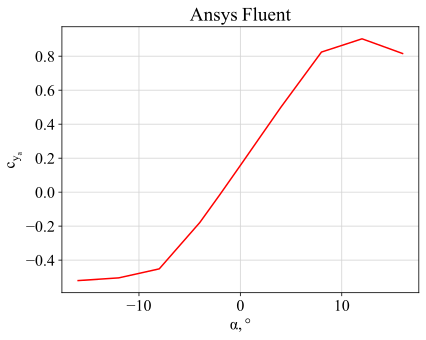

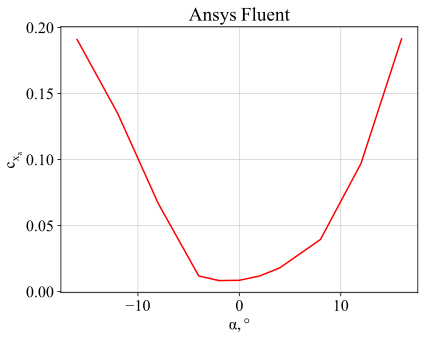

In [52]:
# Визуализация

plt.title('$Ansys\;Fluent$')
plt.plot(alphas, cya, color = 'red', label = '$\lambda=6\;\chi = 0\degree$')
# plt.plot(alpha_lam_6_eta_0, cya_lam_6_eta_0, color = 'blue', label = '$\lambda=6\;\chi = 15\degree$')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{y_a}$')
plt.grid(color = 'lightgray')
# plt.legend(loc = 'best')
plt.show()

plt.title('$Ansys\;Fluent$')
plt.plot(alphas, cxa, color = 'red', label = '$\lambda=6\;\chi = 0\degree$')
# plt.plot(alpha_lam_6_eta_0, cxa_lam_6_eta_0, color = 'blue', label = '$\lambda=6\;\chi = 15\degree$')
plt.xlabel('$\\alpha, \degree$')
plt.ylabel('$c_{x_a}$')
plt.grid(color = 'lightgray')
# plt.legend(loc = 'best')
plt.show()

Text(0, 0.5, '$c_{y_a}$')

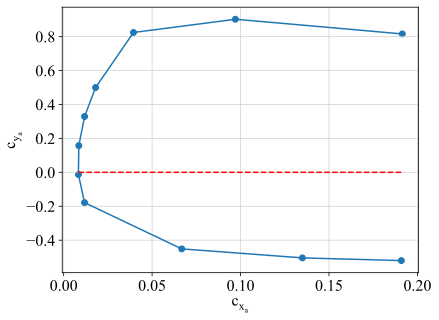

In [53]:
plt.plot(cxa, cya)
plt.scatter(cxa, cya)
plt.hlines(0, np.min(cxa), np.max(cxa), color = 'red', ls = '--')
plt.grid(color = 'lightgray')
plt.xlabel('$c_{x_a}$')
plt.ylabel('$c_{y_a}$')

In [57]:
m_z

array([-0.20994789, -0.18772575, -0.12375955, -0.02467835,  0.02422707,
        0.07507077,  0.12661203,  0.17797982,  0.27285682,  0.3085764 ,
        0.31934721])